In [3]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

- **Dataset(s) to be used:**
[https://data.un.org]
[https://databank.worldbank.org/source/sustainable-development-goals-(sdgs)]
- **Analysis question:**
[What is the relationship between progress in access to affordable and clean energy (SDG 7) and CO2 emissions per capita in different countries?]
- **Columns that will (likely) be used:**
- [Country]
- [Value]
- [Series]
- [Series Name]
- [Year]
- (If you're using multiple datasets) **Columns to be used to merge/join them:*
- [UN Data] [Country]
- [WB Data] [Country]
- **Hypothesis**:
[Countries with greater progress in affordable and sustainable access to clean energy (Goal 7) tend to have lower CO2 emissions per capita, due to the transition to renewable energy sources and improvements in energy efficiency.]
- **Site URL:** [https://angelragas.readthedocs.io/en/latest/intro.html]

# Project 3

## Start: Importing Pandas
The project should start by importing the pandas package.

In [230]:
import pandas as pd

## Project Description
### Data Selection
For the purposes of this project, two datasets from different reputable sources have been selected:

1. **CO2 Emissions Estimates** (Source: [data.un.org](https://data.un.org))
2. **Sustainable Development Goal 7 Indicators** (Source: [World Bank](https://databank.worldbank.org/source/sustainable-development-goals-(sdgs)))

### Variables
We have chosen specific variables from each dataset to use in our analysis:

1. **CO2 Emissions per Capita (UN):** Measures the average amount of carbon dioxide emitted by each person in a country or region.
2. **Goal 7: Affordable and Clean Energy (5-year moving average) (WB):** Measures progress toward affordable and sustainable access to clean energy, allowing for the assessment of sustained advancements toward Sustainable Development Goal (SDG) 7, which relates to affordable and clean energy.

### Research Question
**What is the relationship between progress in access to affordable and clean energy (SDG 7) and CO2 emissions per capita in different countries?**

### Hypothesis
**Countries with greater progress in affordable and sustainable access to clean energy (Goal 7) tend to have lower CO2 emissions per capita, due to the transition to renewable energy sources and improvements in energy efficiency.**

## Step 1: Importing the Datasets
We will proceed to import both datasets in their CSV formats.

In [245]:
un_co2 = pd.read_csv("/Users/jr/Desktop/Project3/SYB66_310_202310_Carbon Dioxide Emission Estimates.csv", 
                       encoding="ISO-8859-1", skiprows=1, header=0)
wb_goal7 = pd.read_csv("/Users/jr/Desktop/Project3/a1e0af5c-dac1-4c14-86fd-f570f33e6848_Data.csv", 
                       encoding="ISO-8859-1")

## Step 2: Visualizing the Datasets (Preliminary)
To verify the column names and visualize the structure of the datasets, we will conduct an initial inspection. This step ensures that the headers have been loaded correctly and helps evaluate whether any column names need to be modified.

In [239]:
un_co2

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,"4,524",NaN,"International Energy Agency, IEA World Energy ..."
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,"7,145",NaN,"International Energy Agency, IEA World Energy ..."
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,"3,980",NaN,"International Energy Agency, IEA World Energy ..."
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,"4,074",NaN,"International Energy Agency, IEA World Energy ..."
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,"3,975",NaN,"International Energy Agency, IEA World Energy ..."
...,...,...,...,...,...,...,...
2259,716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2260,716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.8,NaN,"International Energy Agency, IEA World Energy ..."
2261,716,Zimbabwe,2018,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2262,716,Zimbabwe,2019,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."


In [241]:
wb_goal7

,Country Name,Country Code,Series Name,Series Code,2019 [YR2019]
0,Afghanistan,AFG,Agriculture census (Availability score over 20...,SPI.D4.1.2.AGRI,0.5
1,Afghanistan,AFG,Agriculture survey (Availability score over 10...,SPI.D4.1.5.AGSVY,0
2,Afghanistan,AFG,Availability of Comparable Poverty headcount r...,SPI.D1.5.POV,0
3,Afghanistan,AFG,"Availability of Mortality rate, under-5 (per 1...",SPI.D1.5.CHLD.MORT,1
4,Afghanistan,AFG,Business process,SPI.D5.2.10.GSBP,0
...,...,...,...,...,...
15624,NaN,NaN,NaN,NaN,NaN
15625,NaN,NaN,NaN,NaN,NaN
15626,NaN,NaN,NaN,NaN,NaN
15627,Data from database: Statistical Performance In...,NaN,NaN,NaN,NaN


### Step 2.1: Renaming Columns
We will rename the columns to provide more intuitive and descriptive names, replacing the original ones assigned by international organizations.

In [253]:
un_co2.columns=['N°', 'Country', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
wb_goal7.columns=['Country', 'Country Code', 'Series Name', 'Series Code', 'Value']

### Step 2.2: Selecting Relevant Columns
We will identify the columns of interest in both datasets; specifically, those that will be used for merging and are relevant for the analysis of the results.

### Identification
The following columns of interest were identified in both datasets:

1. **Country**
2. **Series / Series Name**
3. **Value**
4. **Year**

For the UN dataset, the column **Year** will be additionally selected to filter the data for the year 2019. However, for the WB dataset, this is not necessary as only 2019 data was downloaded.

#### Why 2019?
The year 2019 was chosen because, prior to the COVID-19 pandemic (i.e., up until 2019), climate and institutional variables, among others, experienced less variation compared to the post-COVID period, when the pandemic disproportionately affected the most vulnerable countries.

In [256]:
un_co2 = un_co2[['Country', 'Value', 'Series', 'Year']]
wb_goal7 = wb_goal7[['Country', 'Value', 'Series Name']]

## Step 2.3: Verifying the Datasets (Again)
We will recheck the datasets to ensure that the selected columns are correctly loaded and that the data is ready for the next steps of the analysis.

In [259]:
un_co2.head()

,Country,Value,Series,Year
0,Albania,"4,524",Emissions (thousand metric tons of carbon diox...,1975
1,Albania,"7,145",Emissions (thousand metric tons of carbon diox...,1985
2,Albania,"3,980",Emissions (thousand metric tons of carbon diox...,2005
3,Albania,"4,074",Emissions (thousand metric tons of carbon diox...,2010
4,Albania,"3,975",Emissions (thousand metric tons of carbon diox...,2015


In [261]:
wb_goal7.head()

,Country,Value,Series Name
0,Afghanistan,0.5,Agriculture census (Availability score over 20...
1,Afghanistan,0,Agriculture survey (Availability score over 10...
2,Afghanistan,0,Availability of Comparable Poverty headcount r...
3,Afghanistan,1,"Availability of Mortality rate, under-5 (per 1..."
4,Afghanistan,0,Business process


## Step 3: Further Cleaning the Data
Datasets of this nature often contain errors, typos, or specific characteristics that need to be cleaned (and, in many cases, removed) to ensure the data is coherent and suitable for analyzing the variables of interest. Thus, we will proceed with the respective cleaning process for each dataset.

### Step 3.1: Cleaning the UN Data
For the UN dataset, it is necessary to select only official countries and exclude all non-country entries (regions, special areas, unrecognized nations). This is because we will work exclusively with country-level (official) information, which is the first requirement for merging the data with the WB dataset, which is also at the official country level.

#### Step 3.1.1: Identifying Non-Country Entries
We will identify entries that do not correspond to official countries, such as regions, special areas, or unrecognized nations, to ensure they are excluded from the dataset.

In [269]:
excluded_countries = [
    "Total, all countries or areas", "Africa", "Northern Africa", "Sub-Saharan Africa", "Eastern Africa", 
    "Middle Africa", "Southern Africa", "Western Africa", "Americas", 
    "Northern America", "Latin America & the Caribbean", "Caribbean", 
    "Central America", "South America", "Asia", "Central Asia", 
    "Eastern Asia", "South-central Asia", "South-eastern Asia", "Southern Asia", 
    "Western Asia", "Europe", "European Union (EU)","Eastern Europe", "Northern Europe", 
    "Southern Europe", "Western Europe", "Oceania", "Australia and New Zealand", 
    "Melanesia", "Micronesia", "Polynesia", "British Virgin Islands", 
    "Falkland Islands (Malvinas)", "Faroe Islands", "French Guiana", 
    "Guam", "New Caledonia", "Puerto Rico", "Saint Martin (French part)", 
    "Sint Maarten (Dutch part)", "Turks and Caicos Islands", 
    "United States Virgin Islands", "Other non-specified areas", 
    "LLDCs", "LDCs", "SIDS", "LDC§", "LLDC§", "SID§", "American Samoa", "Aruba", "Bermuda", "Bonaire, St. Eustatius & Saba", 
    "British Virgin Islands", "Cayman Islands", "Cook Islands", 
    "Falkland Islands (Malvinas)", "French Guiana", "French Polynesia", 
    "Guam", "Isle of Man", "Montserrat", "New Caledonia", "Niue", 
    "Northern Mariana Islands", "Puerto Rico", "Réunion", 
    "Saint Barthélemy", "Saint Helena", "Saint Martin (French part)", 
    "Sint Maarten (Dutch part)", "Tokelau", "Turks and Caicos Islands", 
    "United States Virgin Islands", "Wallis and Futuna Islands", 
    "Western Sahara", "Anguilla", "Aruba", "Bermuda", "Bonaire, St. Eustatius & Saba", 
    "British Virgin Islands", "Cayman Islands", "Cook Islands", 
    "Falkland Islands (Malvinas)", "French Guiana", "French Polynesia", 
    "Guam", "Isle of Man", "Montserrat", "New Caledonia", "Niue", 
    "Northern Mariana Islands", "Puerto Rico", "Réunion", 
    "Saint Barthélemy", "Saint Helena", "Saint Martin (French part)", 
    "Sint Maarten (Dutch part)", "Tokelau", "Turks and Caicos Islands", 
    "United States Virgin Islands", "Wallis and Futuna Islands", 
    "Western Sahara"
]

#### Step 3.1.2: Filtering Official Countries Only

In [272]:
un_co2_new = un_co2[un_co2["Country"].isin(excluded_countries) == False]
un_co2_new.head()

,Country,Value,Series,Year
0,Albania,"4,524",Emissions (thousand metric tons of carbon diox...,1975
1,Albania,"7,145",Emissions (thousand metric tons of carbon diox...,1985
2,Albania,"3,980",Emissions (thousand metric tons of carbon diox...,2005
3,Albania,"4,074",Emissions (thousand metric tons of carbon diox...,2010
4,Albania,"3,975",Emissions (thousand metric tons of carbon diox...,2015


## Step 3.2: Selecting the Relevant Year
We will inspect the unique year values in the dataset and drop those that are not of interest, retaining only the data for the year 2019.

In [276]:
un_co2_new['Year'].unique()

array([1975, 1985, 2005, 2010, 2015, 2018, 2019, 2020])

In [278]:
filtered_un_co2 = un_co2_new[un_co2_new['Year'] == 2019]

In [280]:
filtered_un_co2['Year'].unique()

array([2019])

## Step 3.3: Standardizing the Values
As the final cleaning step, we will standardize the values in the "Value" column to ensure consistency and prevent potential data issues or biases in the analysis.

### Step 3.3.1: Text Transformation and Removal of Commas
We will convert the values in the "Value" column to text format and remove commas used as separators.

In [287]:
wb_goal7.loc[:, 'Value'] = wb_goal7['Value'].astype(str).str.replace(',', '', regex=False)
filtered_un_co2.loc[:, 'Value'] = filtered_un_co2['Value'].astype(str).str.replace(',', '', regex=False)

### Step 3.3.2: Transforming to Numbers and Replacing with NaN
We will convert the values to numeric format, replacing non-numeric entries with NaN.

In [290]:
wb_goal7.loc[:, 'Value'] = pd.to_numeric(wb_goal7['Value'], errors='coerce')
filtered_un_co2.loc[:, 'Value'] = pd.to_numeric(filtered_un_co2['Value'], errors='coerce')

### Step 3.3.3: Dropping NA Values
We will drop NA values to ensure they are not included in the analysis.

In [293]:
wb_goal7 = wb_goal7.dropna(subset=['Value']).copy()
filtered_un_co2 = filtered_un_co2.dropna(subset=['Value']).copy()

### Step 3.3.4: Converting Year to String

In [296]:
filtered_un_co2['Year'] = filtered_un_co2['Year'].astype(str)

In [298]:
wb_goal7.head()

,Country,Value,Series Name
0,Afghanistan,0.5,Agriculture census (Availability score over 20...
1,Afghanistan,0.0,Agriculture survey (Availability score over 10...
2,Afghanistan,0.0,Availability of Comparable Poverty headcount r...
3,Afghanistan,1.0,"Availability of Mortality rate, under-5 (per 1..."
4,Afghanistan,0.0,Business process


In [300]:
filtered_un_co2.head()

,Country,Value,Series,Year
6,Albania,4200.0,Emissions (thousand metric tons of carbon diox...,2019
14,Albania,1.4,Emissions per capita (metric tons of carbon di...,2019
22,Algeria,143569.0,Emissions (thousand metric tons of carbon diox...,2019
30,Algeria,3.3,Emissions per capita (metric tons of carbon di...,2019
38,Angola,20748.0,Emissions (thousand metric tons of carbon diox...,2019


# Step 4: Selecting Variables of Interest
We will select the variables described at the beginning of the project:

1. **CO2 Emissions per Capita (UN)**
2. **Goal 7: Affordable and Clean Energy (5-year Moving Average) (WB)**

## Step 4.1: Selecting CO2 Emissions

In [306]:
filtered_un_co2['Series'].unique()

array(['Emissions (thousand metric tons of carbon dioxide)',
       'Emissions per capita (metric tons of carbon dioxide)'],
      dtype=object)

In [308]:
final_filtered_un_co2 = filtered_un_co2[filtered_un_co2['Series'] == 'Emissions per capita (metric tons of carbon dioxide)']
final_filtered_un_co2.head()

,Country,Value,Series,Year
14,Albania,1.4,Emissions per capita (metric tons of carbon di...,2019
30,Algeria,3.3,Emissions per capita (metric tons of carbon di...,2019
46,Angola,0.6,Emissions per capita (metric tons of carbon di...,2019
62,Argentina,3.6,Emissions per capita (metric tons of carbon di...,2019
74,Armenia,2.0,Emissions per capita (metric tons of carbon di...,2019


## Step 4.2: Selecting GOAL 7

In [311]:
wb_goal7['Series Name'].unique()

array(['Agriculture census (Availability score over 20 years)',
       'Agriculture survey (Availability score over 10 years)',
       'Availability of Comparable Poverty headcount ratio at $2.15 a day (5 year moving average)',
       'Availability of Mortality rate, under-5 (per 1,000 live births) data meeting quality standards according to UN IGME  (5 year moving average)',
       'Business process',
       'Business/establishment census (Availability score over 20 years)',
       'Business/establishment survey (Availability score over 10 years)',
       'Central government accounting status',
       'Classification of household consumption',
       'Classification of national industry',
       'Classification of status of employment',
       'Compilation of government finance statistics',
       'Compilation of monetary and financial statistics',
       'CPI base year', 'CRVS (WDI)',
       'Dimension 1.5: Data use by international organizations',
       'Dimension 2.1: Data Release

In [313]:
final_wb_goal7 = wb_goal7[wb_goal7['Series Name'] == 'GOAL 7: Affordable and Clean Energy (5 year moving average)']
final_wb_goal7.head()

,Country,Value,Series Name
50,Afghanistan,0.933,GOAL 7: Affordable and Clean Energy (5 year mo...
122,Albania,0.8,GOAL 7: Affordable and Clean Energy (5 year mo...
194,Algeria,0.8,GOAL 7: Affordable and Clean Energy (5 year mo...
266,American Samoa,0.4,GOAL 7: Affordable and Clean Energy (5 year mo...
338,Andorra,0.6,GOAL 7: Affordable and Clean Energy (5 year mo...


# Step 5: Let's Merge!
Now that the datasets are cleaned, the next step is to perform the merge. Using the key value (common column between both dataframes), we will unify the information into a single dataset.

In [317]:
file_merged = pd.merge(final_wb_goal7, final_filtered_un_co2, on=['Country'], how='inner')
file_merged.head()

,Country,Value_x,Series Name,Value_y,Series,Year
0,Albania,0.8,GOAL 7: Affordable and Clean Energy (5 year mo...,1.4,Emissions per capita (metric tons of carbon di...,2019
1,Algeria,0.8,GOAL 7: Affordable and Clean Energy (5 year mo...,3.3,Emissions per capita (metric tons of carbon di...,2019
2,Angola,0.933,GOAL 7: Affordable and Clean Energy (5 year mo...,0.6,Emissions per capita (metric tons of carbon di...,2019
3,Argentina,1.0,GOAL 7: Affordable and Clean Energy (5 year mo...,3.6,Emissions per capita (metric tons of carbon di...,2019
4,Armenia,0.933,GOAL 7: Affordable and Clean Energy (5 year mo...,2.0,Emissions per capita (metric tons of carbon di...,2019


## Step 5.1: Double-Checking the Data
Although we have already removed NA values and standardized the format, we will perform this step again as a safety measure. Immediately after, we will inspect the minimum and maximum values of our variables of interest:  
- **X:** CO2 Emissions per Capita (UN)  
- **Y:** Goal 7: Affordable and Clean Energy (5-year Moving Average) (WB).

In [321]:
file_merged['Value_x'] = pd.to_numeric(file_merged['Value_x'], errors='coerce')
file_merged['Value_y'] = pd.to_numeric(file_merged['Value_y'], errors='coerce')
file_merged = file_merged.dropna(subset=['Value_x', 'Value_y'])

min_x = file_merged['Value_x'].min()
max_x = file_merged['Value_x'].max()

min_y = file_merged['Value_y'].min()
max_y = file_merged['Value_y'].max()

print(f"The range of 'Value_x' is from {min_x} to {max_x}.")
print(f"The range of 'Value_y' is from {min_y} to {max_y}.")

The range of 'Value_x' is from 0.4 to 1.0.
The range of 'Value_y' is from 0.1 to 30.1.


## We have verified that these ranges make sense.

In [324]:
file_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      128 non-null    object 
 1   Value_x      128 non-null    float64
 2   Series Name  128 non-null    object 
 3   Value_y      128 non-null    float64
 4   Series       128 non-null    object 
 5   Year         128 non-null    object 
dtypes: float64(2), object(4)
memory usage: 6.1+ KB


# Step 6: Testing the hypothesis!

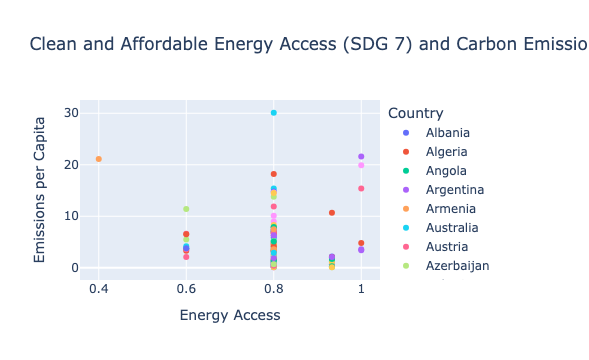

In [329]:
import plotly.express as px
fig = px.scatter(
    file_merged,
    x="Value_x",
    y="Value_y",
    color="Country",
    title="Clean and Affordable Energy Access (SDG 7) and Carbon Emissions per Capita (2019)",
    labels={"Value_x": "Energy Access", "Value_y": "Emissions per Capita"},
)
fig.show()

#### **Conclusion**: The results indicate that the hypothesis is false; there is no significant relationship between the proposed variables. On the contrary, there is a noticeable concentration around the X value **0.8**, which could be influenced by various factors, such as a significant number of countries complying substantially with the provisions of SDG 7.

#### Nevertheless, it is necessary to confirm this finding with a Pearson correlation analysis.

In [335]:
correlation_pearson = file_merged['Value_x'].corr(file_merged['Value_y'])
print(f"The Pearson Correlation is: {correlation_pearson}")

The Pearson Correlation is: -0.10883763043461271


#### **Finally, the Pearson correlation analysis indicates a very slight negative correlation, which is not significant, further confirming that there is no relationship between the two variables.**